<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df.shape

(11398, 85)

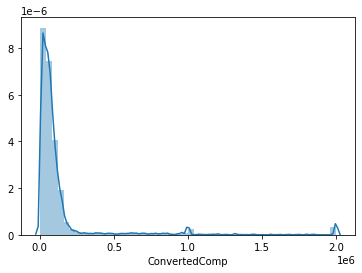

In [4]:
# your code goes here
import seaborn as sns
sns.distplot(df.ConvertedComp)

What is the median of the column `ConvertedComp`?


How many responders identified themselves only as a **Man**?


In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
#clean the age column, we are going to keep rspondents under the age of 65 _ assuming that this is the retirement age 
# check for missing values
df=df.loc[df['Age'] <=65]
df.Age.isnull().sum()

0

In [7]:
df.Age.describe()
#average age in the field is 30

count    11104.000000
mean        30.751918
std          7.312677
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         65.000000
Name: Age, dtype: float64

(array([ 225., 2607., 3579., 2291., 1286.,  578.,  321.,  141.,   52.,
          24.]),
 array([16. , 20.9, 25.8, 30.7, 35.6, 40.5, 45.4, 50.3, 55.2, 60.1, 65. ]),
 <a list of 10 Patch objects>)

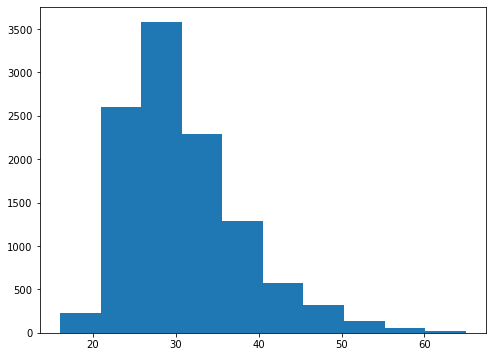

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df.Age)

In [10]:
#outliers for workhours
#we are going to filter works for less than 80 hrs per week
df=df.loc[df['WorkWeekHrs']<=80]

<Figure size 576x432 with 0 Axes>

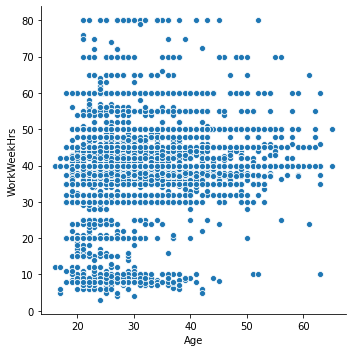

In [11]:
#relationship between Age and Work hours
plt.figure(figsize=(8,6))
sns.relplot(x="Age", y="WorkWeekHrs", data=df)

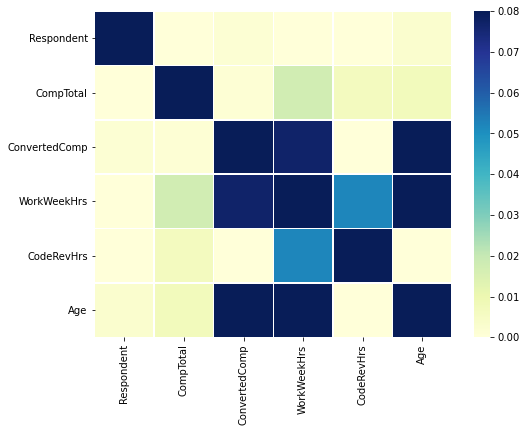

In [12]:
#correlation between age and other factors
age_df = pd.DataFrame(df.corr())
plt.figure(figsize=(8,6))
sns.heatmap(age_df, cmap="YlGnBu", vmin=0, vmax=0.08, linewidths=0.5)

In [14]:
#clean the gender column _ filter the respondants 'men'&'woman'
df= df.loc[(df['Gender']=='Man')|(df['Gender']=='Woman')]

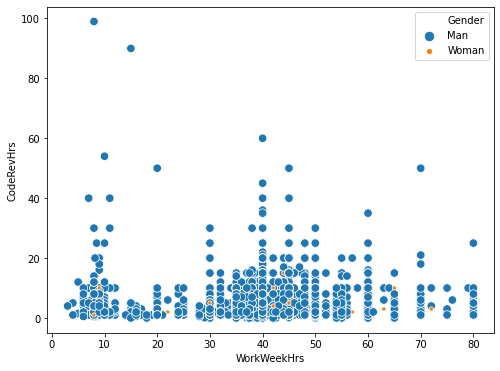

In [15]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size
plt.figure(figsize=(8,6))
sns.scatterplot(x="WorkWeekHrs", 
                y="CodeRevHrs",
                hue='Gender',
                size="Gender",            
                data=df)

#Number of WorkWeekhours and COdeRevhrs are fewer for women than for men

In [16]:
# your code goes here
df.Gender.value_counts()

Man      10004
Woman      709
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
#Avg Salary Man vs Woman
(df.groupby('Gender')['ConvertedComp'].mean())


Gender
Man      133958.294713
Woman    101697.375000
Name: ConvertedComp, dtype: float64

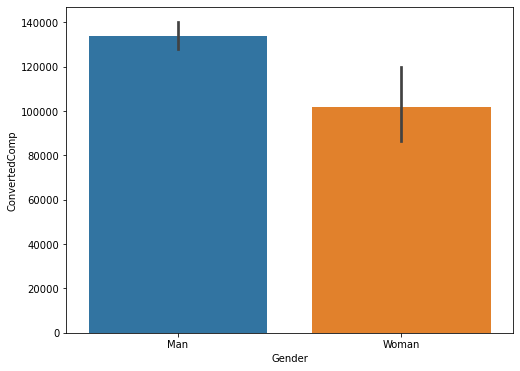

In [18]:
from numpy import mean
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Gender", y="ConvertedComp", data=df, estimator=mean)


In [16]:
print('Number of countries in the survey: ',len(df.Country.value_counts()))

Number of countries in the survey:  135


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [ ]:
df['ConvertedComp']

In [ ]:
# your code goes here
sns.boxplot(df.ConvertedComp)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
Q1= df.ConvertedComp.quantile(0.25)
Q3= df.ConvertedComp.quantile(0.75)
print( 'Inter Quartile Range for ConvertedComp is: ',Q3-Q1)

In [ ]:
#boxplot of Age
sns.boxplot(df.Age)

In [ ]:
#Relationship between age and work week hours
import seaborn as sns
sns.regplot(x="Age", y="WorkWeekHrs", data=df);


In [ ]:
df.shape

In [ ]:
df.LanguageDesireNextYear.value_counts().sort_values(ascending=False)

In [ ]:
db=pd.DataFrame((df.DatabaseDesireNextYear.value_counts()).head())
db

In [ ]:
df_filt= df[df['LanguageWorkedWith'].notnull()]
df_filt.LanguageWorkedWith.isnull().sum()

In [ ]:
#Number of Respondants who currently work with SQL is 7106
sqlwork =df_filt[df_filt['LanguageWorkedWith'].str.contains('SQL')]
sqlwork.shape

In [ ]:
df['DatabaseWorkedWith'].value_counts()

In [ ]:
df['LanguageWorkedWith'].value_counts()

In [ ]:
# Type of developer
(df.DevType.value_counts()).sort_values(ascending=False)


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
df.ConvertedComp.describe()

count    1.004600e+04
mean     1.318260e+05
std      2.949328e+05
min      0.000000e+00
25%      2.688000e+04
50%      5.775100e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [ ]:
outliers = df[df['ConvertedComp'] > df['ConvertedComp'].mean() + 3 * df['ConvertedComp'].std()]
outliers.shape
#We have 240 Outliers in the ConvertedComp column

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
import numpy as np
test = df[np.abs(df.ConvertedComp-df.ConvertedComp.mean()) <= (3*df.ConvertedComp.std())]
test.shape

In [ ]:
#remove outliers from WorkWeekHours because it's impossible to have 1200 workign hours /week
df = df[np.abs(df.WorkWeekHrs-df.WorkWeekHrs.mean()) <= (3*df.WorkWeekHrs.std())]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
#Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35
age_df =df.loc[(30<= df['Age'])&(df['Age']<=35)]
med_workhrs= age_df.WorkWeekHrs.median()

sns.barplot(x='Age', y='WorkWeekHrs', data=age_df)


print('median work hours:',med_workhrs )
print('min work hours:',age_df.WorkWeekHrs.min() )


In [ ]:
sns.barplot(x='Age', y='CodeRevHrs', data=age_df)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
